<a href="https://colab.research.google.com/github/matheusbarraboni/dataScienceAlura/blob/main/aluraDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
data = pd.read_csv(fonte)
data.head()
listaNotas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
data["NU_NOTA_TOTAL"] = data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].sum(axis = 1)
dados_sem_zero = data.query('NU_NOTA_TOTAL != 0')

**Desafio extra 1** - comparar estado residente e estado da prova realizada	

Porcentagem de participantes que fizeram a prova fora de seu estado residente: 0.96%


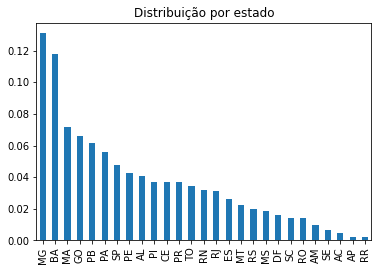

In [ ]:
diferente = data.query('SG_UF_PROVA != SG_UF_RESIDENCIA')

plt.title("Distribuição por estado")
diferente['SG_UF_RESIDENCIA'].value_counts(normalize=True).plot.bar()

print(f"Porcentagem de participantes que fizeram a prova fora de seu estado residente: {(len(diferente) / len(data)) * 100:.2f}%")


**Desafio 1** - menores de 18 anos visualizar estado que reside

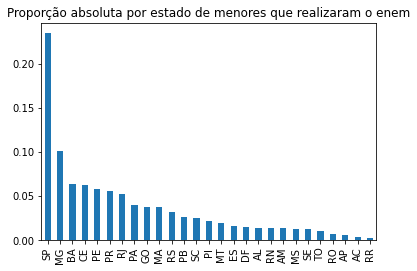

In [ ]:
menor_idade = data.query("NU_IDADE < 18")
plt.title("Proporção absoluta por estado de menores que realizaram o enem")
menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar()

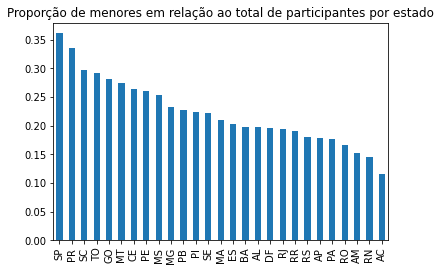

In [ ]:
quant_total = data['SG_UF_RESIDENCIA'].value_counts()
quant_menores = menor_idade["SG_UF_RESIDENCIA"].value_counts()
prop_menores_uf =  quant_menores / quant_total
plt.title("Proporção de menores em relação ao total de participantes por estado")
prop_menores_uf.sort_values(ascending=False).plot.bar()

**Desafio 1** - definir função para criar boxplots com o seaborn

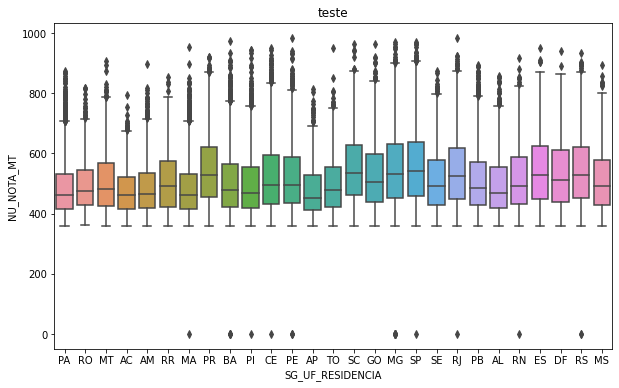

In [ ]:
def criaBoxplot(eixoX, eixoY, dados, ordem=None, titulo='', cor=None):
  plt.figure(figsize= (10, 6))
  sns.boxplot(x=eixoX, y=eixoY, data=dados, order=ordem, hue=cor)
  plt.title(titulo)

def criaLineplot(eixoX, eixoY, dados, titulo='', cor=None):
  plt.figure(figsize= (10, 6))
  sns.lineplot(x=eixoX, y=eixoY, data=dados, hue=cor)
  plt.title(titulo)

# teste
criaBoxplot(eixoX='SG_UF_RESIDENCIA', eixoY='NU_NOTA_MT', dados=data, titulo='teste')

**Desafio 2** - descobrir o motivo de quem está zerado
**Desafio 3** - descobrir se quem foi zerado recebeu NaN(Not a Number) ou 0

In [ ]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

print(data.query('NU_NOTA_CN == 0')['TP_PRESENCA_CN'])

""" 0 = faltou a prova
    1 = presente na prova
    2 = eliminado na prova
"""

6437      1
7076      1
8693      1
28755     1
34210     1
41918     1
48903     1
61695     1
61914     1
70163     1
91327     1
101269    1
104065    1
109408    1
109621    1
120048    1
120412    1
123391    1
Name: TP_PRESENCA_CN, dtype: int64


' 0 = faltou a prova\n    1 = presente na prova\n    2 = eliminado na prova\n'

**Desafio 4** - verificar se quem não esteve presente tem carro ou moto

In [ ]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
data['NU_PRESENCA'] = data[presenca].sum(axis=1)
veiculo = data.query('NU_PRESENCA == 0')[['Q010', 'Q011']]
veiculo.value_counts(normalize=True)


"""
A - Não possui
B - Sim, um
C - Sim, dois
D - Sim, três
E - Sim, quatro ou mais
"""



Q010  Q011
A     A       0.515863
B     A       0.226809
A     B       0.123112
B     B       0.064108
C     A       0.034244
      B       0.009001
A     C       0.008794
B     C       0.005966
D     A       0.005621
C     C       0.001690
D     B       0.001172
E     A       0.001104
D     C       0.000517
B     D       0.000483
A     D       0.000379
E     B       0.000345
C     D       0.000241
D     D       0.000138
E     C       0.000138
B     E       0.000103
A     E       0.000069
E     D       0.000034
C     E       0.000034
E     E       0.000034
dtype: float64

**Desafio 5** - verificar o numero de treineiros conforme a renda

Text(0.5, 1.0, 'Numeros absolutos de treineiros conforme renda')

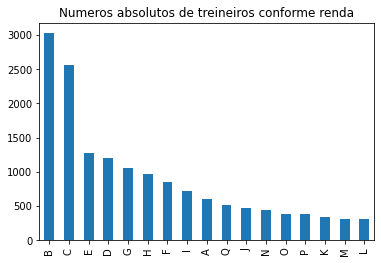

In [ ]:
treineiros = data.query('IN_TREINEIRO == 1')
rendaOrdenada = data['Q006'].unique()
rendaOrdenada.sort()
quant_trein_renda = treineiros['Q006'].value_counts()
quant_trein_renda.plot.bar()
plt.title("Numeros absolutos de treineiros conforme renda")

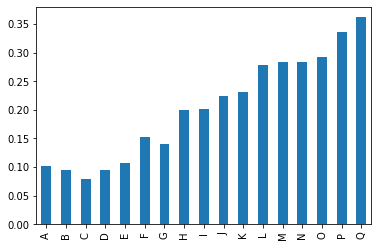

In [ ]:
quant_total_renda = data['Q006'].value_counts()
prop_trein_renda = quant_trein_renda / quant_total_renda
prop_trein_renda.plot.bar()

**Desafio 6** - descobrir se quem tem internet em casa tem notas maiores

A - não tem acesso a internet
B - tem acesso a internet


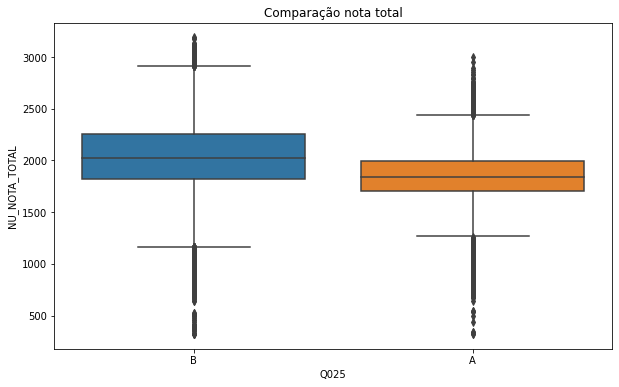

In [ ]:
criaPlot(eixoX='Q025', eixoY='NU_NOTA_TOTAL', dados=dados_sem_zero, titulo='Comparação nota total')
print('A - não tem acesso a internet')
print('B - tem acesso a internet')

**Desafio 1** - Plotar as médias, medianas, e moda nas notas de LC e MT (matplotlib linha vertical)

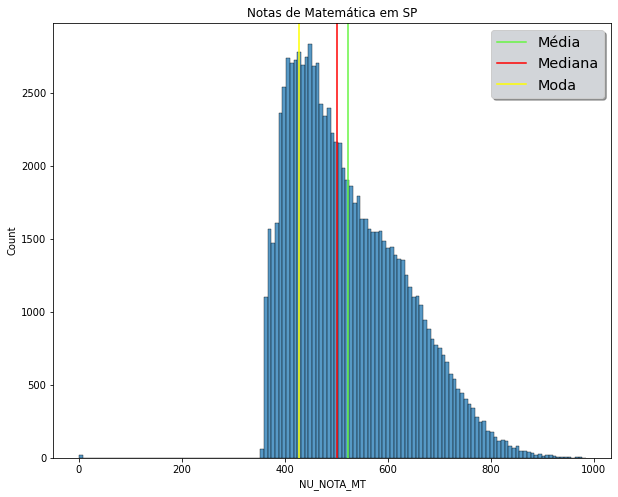

In [ ]:
plt.figure(figsize=(10, 8))
hist_mt = sns.histplot(dados_sem_zero, x = 'NU_NOTA_MT')
plt.title('Notas de Matemática em SP')

media = dados_sem_zero['NU_NOTA_MT'].mean()
mediana = dados_sem_zero['NU_NOTA_MT'].median()
moda = dados_sem_zero['NU_NOTA_MT'].value_counts().idxmax()

hist_mt.axvline(x = media, color='#66f542', label='Média')
hist_mt.axvline(x = mediana, color='red', label='Mediana')
hist_mt.axvline(x = moda, color='yellow', label='Moda')
hist_mt.legend(loc='upper right', shadow=True, fontsize='x-large').get_frame().set_facecolor('#d2d5d9')


**Desafio 2** - Melhorar a visualização da matriz de correlação e analisar mais detalhadamente
**Desafio 4** - Pensar sobre a correlação entre matemática e linguagens

(300.0, 1050.0)

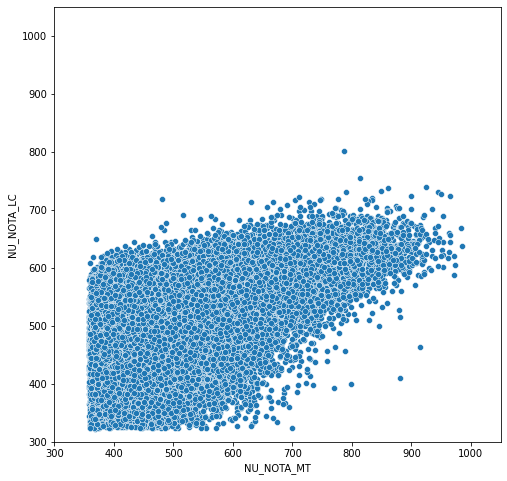

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=dados_sem_zero, x='NU_NOTA_MT', y='NU_NOTA_LC')
plt.xlim(300, 1050)
plt.ylim(300, 1050)

# Uma possivel correlação é o melhor preparo para uma matéria influência no preparo para todas as matérias

(300.0, 1050.0)

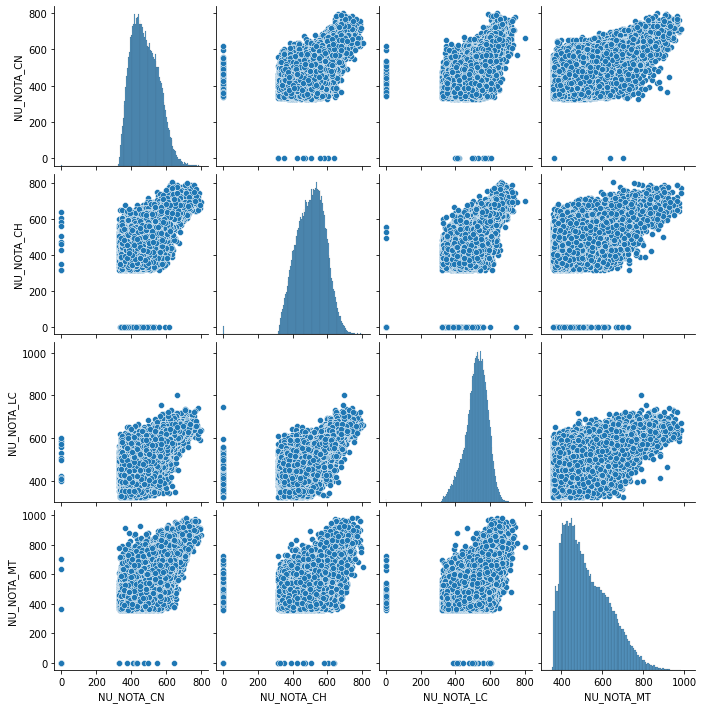

In [ ]:
sns.pairplot(dados_sem_zero[listaNotas])

In [ ]:
dados_sem_zero[listaNotas].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
NU_NOTA_CN,1.000000,0.668838,0.641437,0.649421
NU_NOTA_CH,0.668838,1.000000,0.742532,0.610212
NU_NOTA_LC,0.641437,0.742532,1.000000,0.587572
NU_NOTA_MT,0.649421,0.610212,0.587572,1.000000


**Desafio 3** - Filtrar as notas por seu estado ou cidade e refazer as análises, verificando se são semelhantes ao geral

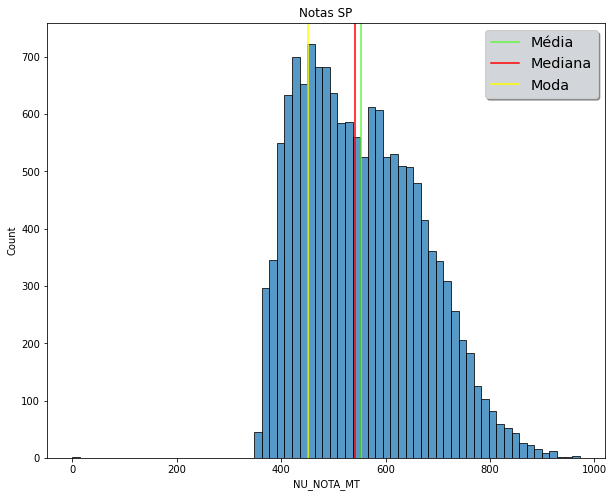

In [ ]:
data_sp = data.query('SG_UF_RESIDENCIA == "SP"')
plt.figure(figsize=(10, 8))
hist_mt = sns.histplot(data_sp, x = 'NU_NOTA_MT')
plt.title('Notas de Matemática em SP')

media = data_sp['NU_NOTA_MT'].mean()
mediana = data_sp['NU_NOTA_MT'].median()
moda = data_sp['NU_NOTA_MT'].value_counts().idxmax()

hist_mt.axvline(x = media, color='#66f542', label='Média')
hist_mt.axvline(x = mediana, color='red', label='Mediana')
hist_mt.axvline(x = moda, color='yellow', label='Moda')
hist_mt.legend(loc='upper right', shadow=True, fontsize='x-large').get_frame().set_facecolor('#d2d5d9')



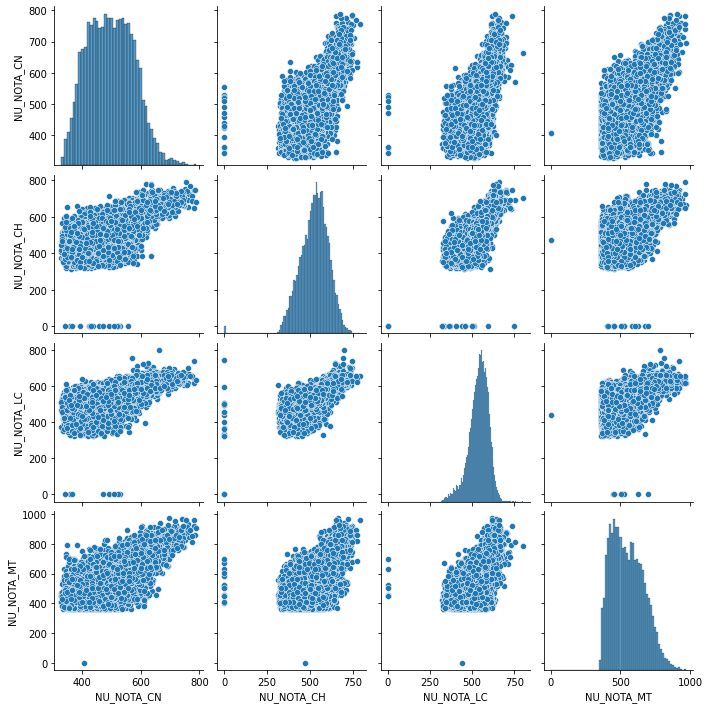

In [ ]:
sns.pairplot(data_sp[listaNotas])

In [ ]:
data_sp[listaNotas].corr()

# com o foco no estado de são paulo as correlações estão levemente mais fortes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
NU_NOTA_CN,1.000000,0.688268,0.652432,0.686403
NU_NOTA_CH,0.688268,1.000000,0.762517,0.621622
NU_NOTA_LC,0.652432,0.762517,1.000000,0.598929
NU_NOTA_MT,0.686403,0.621622,0.598929,1.000000


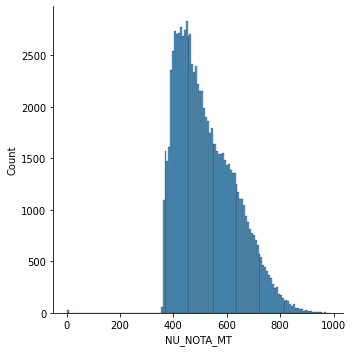

In [ ]:
# Bloco de testes
sns.displot(data=data, x='NU_NOTA_MT')

## Aula 4

In [ ]:
provas = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
provasEntrada = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
provasSaida = 'NU_NOTA_MT'

dados_sem_zero = dados_sem_zero[provas].dropna()
x  = dados_sem_zero[provasEntrada]
y  = dados_sem_zero[provasSaida]


0         432.4
2         427.2
3         499.9
4         424.5
5         615.6
          ...  
127373    386.7
127375    539.7
127376    418.2
127378    455.7
127379    438.5
Name: NU_NOTA_MT, Length: 92536, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

xTreino, xTeste, yTreino, yTeste = train_test_split(x, y, test_size=0.25,
                                                    random_state=SEED)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(xTreino, yTreino)

predicoesMatematica = modelo.predict(xTeste)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(-50.0, 1050.0)

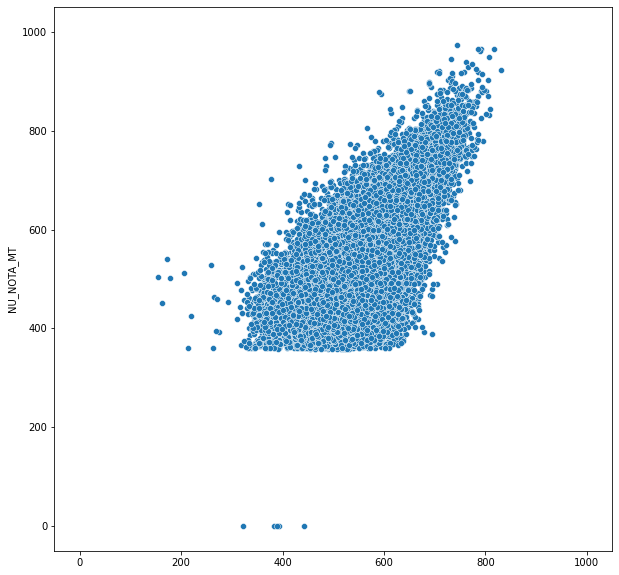

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=predicoesMatematica, y=yTeste)
plt.xlim(-50, 1050)
plt.ylim(-50, 1050)

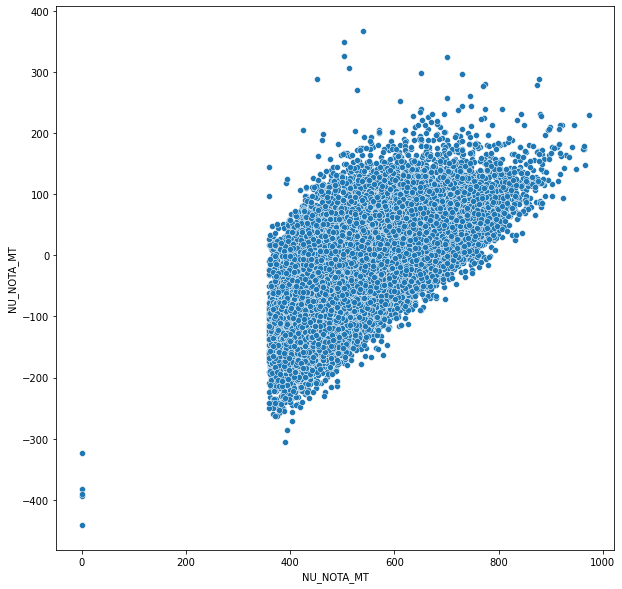

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=yTeste, y=yTeste - predicoesMatematica)


In [ ]:
resultados = pd.DataFrame()
resultados['real'] = yTeste
resultados['previsao'] = predicoesMatematica
resultados['diferenca'] = yTeste - predicoesMatematica
resultados['quadradoDiferenca'] = resultados['diferenca']**2

resultados.head()

,real,previsao,diferenca,quadradoDiferenca
125777,506.2,426.403332,79.796668,6367.508251
50914,484.4,534.437716,-50.037716,2503.773025
54304,561.4,617.869061,-56.469061,3188.754894
21867,490.7,576.920054,-86.220054,7433.897780
97770,546.6,566.457474,-19.857474,394.319293


In [ ]:
resultados['quadradoDiferenca'].mean()

6713.723041522115

In [ ]:
from sklearn.dummy import DummyRegressor

modeloDummy = DummyRegressor()
modeloDummy.fit(xTreino, yTreino)
predicaoDummy = modeloDummy.predict(xTeste)

from sklearn.metrics import mean_squared_error

mean_squared_error(yTeste, predicaoDummy)

12052.657776474456

In [ ]:
mean_squared_error(yTeste, predicoesMatematica)

6713.7230415221575

## Testes

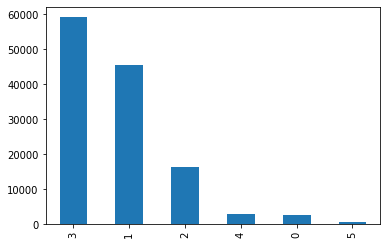

In [ ]:
data['TP_COR_RACA'].value_counts().plot.bar()


In [ ]:
def add_dic_df (df, dic, coluna, nova_coluna):
# criando nova coluna com as respostas para cada tipo de resposta do dicionário
  df[str(nova_coluna)] = [dic[resp] for resp in df[coluna]]

NameError: ignored

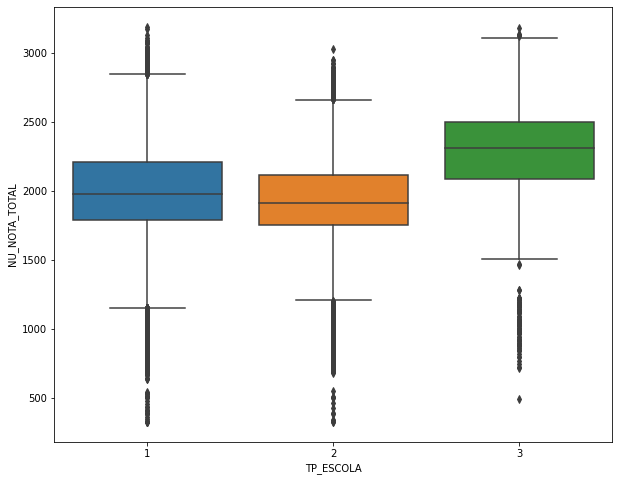

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=dados_sem_zero, x='TP_ESCOLA', y='NU_NOTA_TOTAL')


Quantidade de vestibulandos por tipo de escola no ensino médio:
Pública: 31045
Particular: 5528


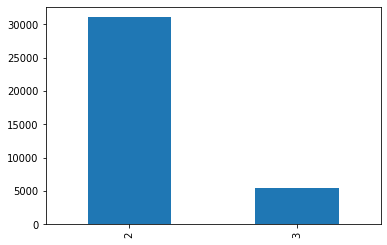

In [ ]:
# filtrar TP_ESCOLA para remover 1 (Não respondeu)
dados_escola = dados.query('TP_ESCOLA != 1')
# verificando a diferença de quantidade de alunos que fizeram o colegial em escola pública  ou particular
quant_escola = dados_escola['TP_ESCOLA'].value_counts()
quant_escola.plot.bar()
print(f"Quantidade de vestibulandos por tipo de escola no ensino médio:")
print(f"Pública: {quant_escola[2]}")
print(f"Particular: {quant_escola[3]}")

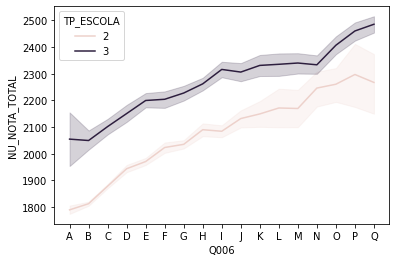

In [ ]:

#ordenando o Dataframe de acordo com a coluna 'Q006'
dados_escola_sem_zero = dados_escola_sem_zero.sort_values('Q006')

sns.lineplot(data=dados_escola_sem_zero, x='Q006', y='NU_NOTA_TOTAL', hue='TP_ESCOLA')

# Tipo de escola 2 = Pública
# Tipo de escola 3 = Particular

Abaixo temos um gráfico do tipo boxplot que revela essa situação mais detalhadamente

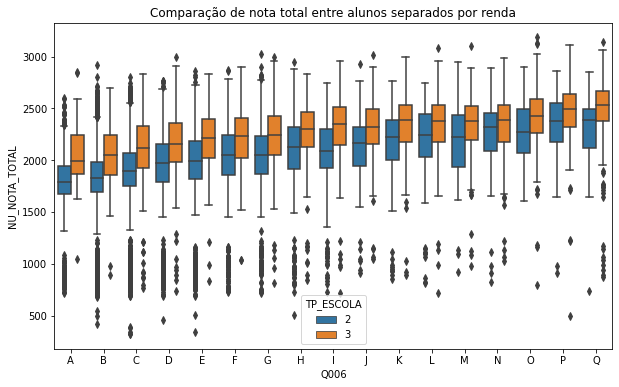

In [ ]:
# ordenando a classificação de renda
renda_ordenada = dados_sem_zero['Q006'].unique()
renda_ordenada.sort()

# filtrando o tipo de escola sem a opção "Não respondeu"
dados_escola_sem_zero = dados_sem_zero.query('TP_ESCOLA != 1')

criaPlot(eixoX='Q006', eixoY='NU_NOTA_TOTAL', dados=dados_escola_sem_zero, ordem=renda_ordenada,
         titulo='Comparação de nota total entre alunos separados por renda',
         cor = 'TP_ESCOLA')

# 

Text(0.5, 1.0, 'Quantidade de vestibulandos ')

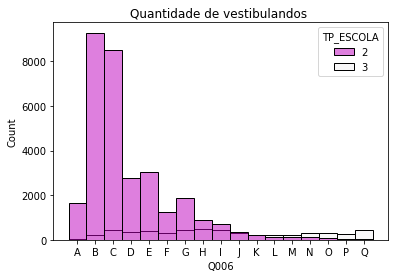

In [ ]:
dados_escola = data.query('TP_ESCOLA != 1').sort_values('Q006')
sns.histplot(dados_escola, x='Q006', hue='TP_ESCOLA', palette="light:m_r")
plt.title('Quantidade de vestibulandos por renda e tipo de colegial')
# Tipo de escola 2 = Pública
# Tipo de escola 3 = Particular

In [ ]:
# definido função para retornar um dicionário com as taxas de escola publica e particular
def criaTaxa(listaTaxa):
  dados_escola
  lista_taxas = {}
  for i in listaTaxa:
    taxas = dados_escola.query(f'Q006 == "{i}"')['TP_ESCOLA'].value_counts(normalize=True)
    lista_taxas[i] = taxas
  return lista_taxas

# usando a função pela renda
lista_taxas = criaTaxa(renda_ordenada)

In [ ]:
for i in renda_ordenada:
  print(f'{i}: Escola pública    {lista_taxas[i][2]:.2f}%')
  print(f'   Escola particular {lista_taxas[i][3]:.2f}%')
  print()


A: Escola pública    0.97%
   Escola particular 0.03%

B: Escola pública    0.98%
   Escola particular 0.02%

C: Escola pública    0.95%
   Escola particular 0.05%

D: Escola pública    0.88%
   Escola particular 0.12%

E: Escola pública    0.88%
   Escola particular 0.12%

F: Escola pública    0.80%
   Escola particular 0.20%

G: Escola pública    0.80%
   Escola particular 0.20%

H: Escola pública    0.63%
   Escola particular 0.37%

I: Escola pública    0.62%
   Escola particular 0.38%

J: Escola pública    0.53%
   Escola particular 0.47%

K: Escola pública    0.50%
   Escola particular 0.50%

L: Escola pública    0.37%
   Escola particular 0.63%

M: Escola pública    0.35%
   Escola particular 0.65%

N: Escola pública    0.28%
   Escola particular 0.72%

O: Escola pública    0.23%
   Escola particular 0.77%

P: Escola pública    0.16%
   Escola particular 0.84%

Q: Escola pública    0.10%
   Escola particular 0.90%

